In [141]:
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import roc_auc_score, f1_score

from sklearn.dummy import DummyClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics as sm
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.utils import class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [186]:
df_final = pd.read_csv('final.csv')

In [187]:
df_final2 = pd.read_csv('recent_performance.csv')
df_final2=df_final2.drop(labels=['Unnamed: 0','AWAY_TEAM_ABBREVIATION','GAME_ID','HOME_TEAM_ABBREVIATION'],axis=1)
df_final2=df_final2.drop(labels=['A_Last_10_Avg_OREB_PCT','A_Last_10_Avg_DREB_PCT','A_Last_10_Avg_REB_PCT','H_Last_10_Avg_OREB_PCT',
                                'H_Last_10_Avg_DREB_PCT','H_Last_10_Avg_REB_PCT','H_Last_10_Avg_PTS','H_Last_10_Avg_PLUS_MINUS',
                                'A_Last_10_Avg_PTS','A_Last_10_Avg_PLUS_MINUS'],axis=1)

In [188]:
df_final

,Unnamed: 0,AWAY_TEAM_ABBREVIATION,GAME_ID,AWAY_STL,AWAY_BLK,AWAY_PF,AWAY_PTS,AWAY_PLUS_MINUS,HOME_TEAM_ABBREVIATION,HOME_STL,...,AWAY_AST_RATIO,AWAY_OREB_PCT,AWAY_DREB_PCT,AWAY_REB_PCT,AWAY_TM_TOV_PCT,AWAY_TS_PCT,AWAY_E_PACE,AWAY_PACE,AWAY_PIE,HomeWin
0,0,NYK,21600001,6,6,22,88,-29,CLE,12,...,13.0,0.271,0.647,0.445,17.8,0.459,103.58,101.0,0.297,1
1,1,UTA,21600002,9,5,19,104,-9,POR,5,...,15.6,0.262,0.778,0.500,15.4,0.584,94.86,91.5,0.452,1
2,2,SAS,21600003,13,3,19,129,29,GSW,11,...,16.8,0.472,0.792,0.624,14.0,0.589,101.68,100.5,0.600,0
3,3,MIA,21600004,5,7,22,108,12,ORL,5,...,15.1,0.321,0.585,0.450,11.7,0.474,98.68,95.0,0.430,0
4,4,DAL,21600005,8,8,27,121,-9,IND,11,...,19.5,0.216,0.754,0.509,13.8,0.602,105.46,104.6,0.571,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,7054,TOR,22101226,10,2,17,94,-11,NYK,6,...,19.6,0.286,0.729,0.490,14.6,0.485,100.56,96.0,0.439,1
7055,7055,MIA,22101227,5,4,13,111,-14,ORL,4,...,23.5,0.191,0.772,0.510,9.9,0.643,101.10,100.0,0.576,1
7056,7056,DET,22101228,4,4,16,106,-12,PHI,13,...,18.6,0.302,0.627,0.479,11.3,0.601,99.94,96.5,0.591,1
7057,7057,SAC,22101229,9,7,18,116,7,PHX,9,...,20.0,0.179,0.635,0.461,15.2,0.650,102.40,99.0,0.568,0


In [189]:
df_final=df_final.drop(labels=['Unnamed: 0','AWAY_TEAM_ABBREVIATION','GAME_ID','HOME_TEAM_ABBREVIATION'],axis=1)

In [190]:
df_final2

,H_Team_Elo_Before,A_Team_Elo_Before,H_Last_10_Avg_STL,H_Last_10_Avg_BLK,H_Last_10_Avg_PF,H_Last_10_Avg_OFF_RATING,H_Last_10_Avg_DEF_RATING,H_Last_10_Avg_AST_TOV,H_Last_10_Avg_AST_RATIO,H_Last_10_Avg_TM_TOV_PCT,...,A_Last_10_Avg_BLK,A_Last_10_Avg_PF,A_Last_10_Avg_OFF_RATING,A_Last_10_Avg_DEF_RATING,A_Last_10_Avg_AST_TOV,A_Last_10_Avg_AST_RATIO,A_Last_10_Avg_TM_TOV_PCT,A_Last_10_Avg_TS_PCT,A_Last_10_Avg_PACE,A_Last_10_Avg_PIE
0,1500.000000,1500.000000,12.0,5.0,22.0,115.80,87.10,2.070,20.90,14.90,...,6.0,22.0,87.10,115.80,0.940,13.00,17.80,0.4590,101.000,0.2970
1,1500.000000,1500.000000,5.0,3.0,18.0,122.80,114.30,1.690,18.40,14.10,...,5.0,19.0,114.30,122.80,1.360,15.60,15.40,0.5840,91.500,0.4520
2,1500.000000,1500.000000,11.0,6.0,19.0,99.00,129.00,1.500,18.10,15.80,...,3.0,19.0,129.00,99.00,1.790,16.80,14.00,0.5890,100.500,0.6000
3,1500.000000,1500.000000,10.0,4.0,24.0,112.90,118.80,1.930,20.40,14.90,...,1.0,23.0,118.80,112.90,1.310,15.50,15.80,0.6080,101.000,0.4970
4,1500.000000,1500.000000,6.0,3.0,29.0,96.90,116.50,1.110,15.80,18.60,...,5.0,20.0,116.50,96.90,1.710,17.70,14.40,0.5800,97.000,0.6170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7054,1506.607511,1610.871051,10.0,3.5,17.2,121.36,113.29,2.035,20.71,15.33,...,3.8,23.4,108.26,115.68,1.683,16.69,14.08,0.5589,98.600,0.4539
7055,1306.280083,1642.152228,6.8,4.8,19.4,112.15,111.93,2.106,18.26,12.60,...,4.2,18.9,115.73,109.73,2.149,18.25,14.38,0.5757,96.805,0.5185
7056,1595.539673,1382.558218,6.5,3.9,18.6,110.01,106.12,2.104,18.78,12.32,...,2.7,20.1,117.59,115.00,2.089,19.31,13.91,0.6125,96.600,0.5205
7057,1686.415379,1356.545289,8.0,4.4,17.4,116.90,110.24,2.214,19.81,12.88,...,3.0,18.2,120.75,114.84,2.218,18.57,12.04,0.6225,96.100,0.5450


In [191]:
df_final=df_final.drop(labels=['AWAY_OREB_PCT','AWAY_DREB_PCT','AWAY_REB_PCT'],axis=1)
df_final=df_final.drop(labels=['HOME_OREB_PCT','HOME_DREB_PCT','HOME_REB_PCT'],axis=1)

In [192]:
df_final=df_final.drop(labels=['AWAY_PLUS_MINUS','HOME_PLUS_MINUS'],axis=1)

In [193]:
df_final=df_final.drop(labels=['AWAY_PTS','HOME_PTS'],axis=1)

In [194]:

x = df_final.drop(['HomeWin'], axis=1)

y = df_final['HomeWin']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [195]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AWAY_STL         7059 non-null   int64  
 1   AWAY_BLK         7059 non-null   int64  
 2   AWAY_PF          7059 non-null   int64  
 3   HOME_STL         7059 non-null   int64  
 4   HOME_BLK         7059 non-null   int64  
 5   HOME_PF          7059 non-null   int64  
 6   HOME_OFF_RATING  7059 non-null   float64
 7   HOME_DEF_RATING  7059 non-null   float64
 8   HOME_AST_TOV     7059 non-null   float64
 9   HOME_AST_RATIO   7059 non-null   float64
 10  HOME_TM_TOV_PCT  7059 non-null   float64
 11  HOME_TS_PCT      7059 non-null   float64
 12  HOME_PACE        7059 non-null   float64
 13  HOME_PIE         7059 non-null   float64
 14  AWAY_OFF_RATING  7059 non-null   float64
 15  AWAY_DEF_RATING  7059 non-null   float64
 16  AWAY_AST_TOV     7059 non-null   float64
 17  AWAY_AST_RATIO

In [196]:
def run_exps(X_train, y_train, X_test, y_test) :
    '''
    Lightweight script to test many models and find winners
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    :return: DataFrame of predictions
    '''
    
    dfs = []
    
    models = [
          ('LogReg', LogisticRegression(solver='lbfgs', max_iter=10000)), 
          ('RF', RandomForestClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC()), 
          ('GNB', GaussianNB()),
        ]
    
    results = []
    
    names = []
    
    scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
    
    target_names = ['win', 'loss']
    
    for name, model in models:
        
        kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
        cv_results = model_selection.cross_validate(model, X_train, y_train, cv=kfold, scoring=scoring)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        results.append(cv_results)
        names.append(name)
        
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
        
    final = pd.concat(dfs, ignore_index=True)
    
    return final
final = run_exps(X_train, y_train, X_test, y_test)
final

LogReg
              precision    recall  f1-score   support

         win       0.64      0.61      0.63      1063
        loss       0.63      0.66      0.64      1055

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118

RF
              precision    recall  f1-score   support

         win       0.73      0.70      0.71      1063
        loss       0.71      0.73      0.72      1055

    accuracy                           0.72      2118
   macro avg       0.72      0.72      0.72      2118
weighted avg       0.72      0.72      0.72      2118

KNN
              precision    recall  f1-score   support

         win       0.64      0.62      0.63      1063
        loss       0.63      0.65      0.64      1055

    accuracy                           0.63      2118
   macro avg       0.63      0.63      0.63      2118
weighted avg       0.63      0.63      0.63      2118

SVM
 

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.085398,0.009004,0.618807,0.618634,0.618807,0.618644,0.669553,LogReg
1,0.239723,0.016634,0.628543,0.628711,0.628543,0.628518,0.673363,LogReg
2,0.163045,0.007105,0.627530,0.627598,0.627530,0.627500,0.675477,LogReg
3,0.121305,0.006999,0.651822,0.651907,0.651822,0.651479,0.714234,LogReg
4,0.087773,0.005998,0.617409,0.617615,0.617409,0.617472,0.674762,LogReg
5,1.122420,0.063021,0.704752,0.704936,0.704752,0.704798,0.794373,RF
6,1.335114,0.081339,0.715587,0.715856,0.715587,0.715556,0.792074,RF
7,1.253240,0.072977,0.678138,0.678138,0.678138,0.678138,0.771650,RF
8,0.923877,0.053595,0.738866,0.739752,0.738866,0.738797,0.801162,RF
9,0.920611,0.077816,0.676113,0.676774,0.676113,0.676166,0.754987,RF


In [200]:
X = df_final.drop(['HomeWin'], axis=1)
y = df_final['HomeWin']
y = y.astype(np.float64)
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=0, shuffle=True)

In [201]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(5,5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes.legend(loc="best")

    return plt

C:\Users\jack\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

ROC Score: 0.6363379558294813, F1 score: 0.645303867403315 and Accuracy Score: 0.6362606232294618.


C:\Users\jack\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jack\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

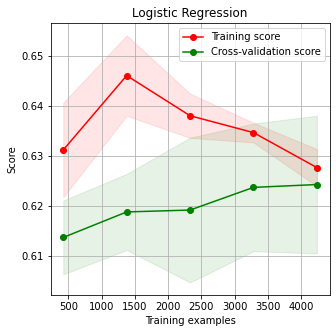

In [116]:
model1 = LogisticRegression(random_state=0)
model1.fit(train_X, train_y)
preds1 = model1.predict(test_X)

roc_1 = roc_auc_score(test_y, preds1)
f1_1 = f1_score(test_y, preds1)
score_1 = model1.score(test_X, test_y)

print(f'ROC Score: {roc_1}, F1 score: {f1_1} and Accuracy Score: {score_1}.')

plot_learning_curve(model1, 'Logistic Regression', train_X, train_y)

ROC Score: 0.6380328710837186, F1 score: 0.6463752075262867 and Accuracy Score: 0.6379603399433428


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

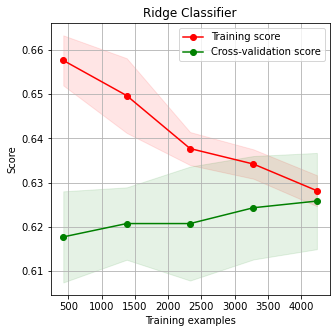

In [117]:
model2 = RidgeClassifierCV()
model2.fit(train_X, train_y)
preds2 = model2.predict(test_X)

roc_2 = roc_auc_score(test_y, preds2)
f1_2 = f1_score(test_y, preds2)
score_2 = model2.score(test_X, test_y)

print(f'ROC Score: {roc_2}, F1 score: {f1_2} and Accuracy Score: {score_2}')

plot_learning_curve(model2, 'Ridge Classifier', train_X, train_y)

C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


ROC Score: 0.5199120441705187, F1 Score: 0.09237379162191192 and Accuracy Score: 0.5212464589235127


C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\jack\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

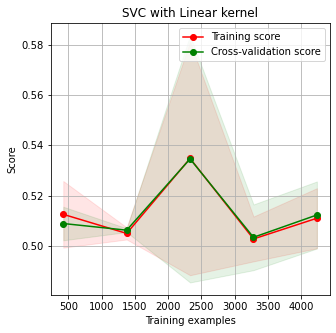

In [118]:
model3 = LinearSVC(random_state=0)
model3.fit(train_X, train_y)
preds3 = model3.predict(test_X)

f1_3 = f1_score(test_y, preds3)
roc_3 = roc_auc_score(test_y, preds3)
score_3 = model3.score(test_X, test_y)

print(f'ROC Score: {roc_3}, F1 Score: {f1_3} and Accuracy Score: {score_3}')

plot_learning_curve(model3, 'SVC with Linear kernel', train_X, train_y)

In [119]:
model4 = LassoCV(random_state=0,tol=0.1)
model4.fit(train_X, train_y)
preds4 = model4.predict(test_X)

roc_4 = roc_auc_score(test_y, preds4)
f1_4 = f1_score(test_y, preds4)
score_4 = model4.score(test_X, test_y)
print(f'ROC Score: {roc_4}, F1 Score: {f1_4} and Accuracy Score: {score_4}')

plot_learning_curve(model4, 'Lasso Classifier', train_X, train_y)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [113]:
model5 = ElasticNetCV()
model5.fit(train_X, train_y)
preds5 = model5.predict(test_X)

roc_5 = roc_auc_score(test_y, preds5)
f1_5 = f1_score(test_y, preds5)
score_5 = model5.score(test_X, test_y)
print(f'ROC Score: {roc_5}, F1 Score: {f1_5} and Accuracy Score: {score_5}')

plot_learning_curve(model5, 'Elastic Net Classifier', train_X, train_y)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [106]:
model6 = DecisionTreeClassifier(random_state=0)
data = model6.fit(train_X, train_y)
preds6 = model6.predict(test_X)

roc_6 = roc_auc_score(test_y, preds6)
f1_6 = f1_score(test_y, preds6)
score_6 = model6.score(test_X, test_y)
print(f'ROC Score: {roc_6}, F1 Score: {f1_6} and Accuracy Score: {score_6}')



ROC Score: 0.5988700564971752, F1 Score: 0.5986394557823129 and Accuracy Score: 0.5988668555240794


In [140]:
model7 = RandomForestClassifier(random_state=0)
model7.fit(train_X, train_y)
preds7 = model7.predict(test_X)

roc_7 = roc_auc_score(test_y, preds7)
f1_7 = f1_score(test_y, preds7)
score_7 = model7.score(test_X, test_y)

print(f'ROC Score: {roc_7}, F1 Score: {f1_7} and Accuracy Score: {score_7}')

plot_learning_curve(model7, 'Random Forest Classifier', train_X, train_y
                   )

ValueError: Found input variables with inconsistent numbers of samples: [5294, 4941]

ROC Score: 0.6153184386235233, F1 Score: 0.6174647887323944 and Accuracy Score: 0.6152974504249292


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

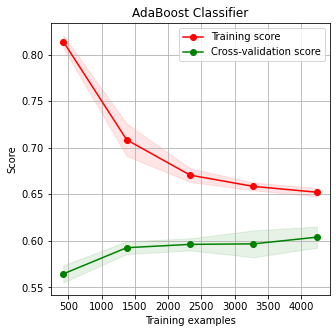

In [101]:
model8 = AdaBoostClassifier(random_state=0)
model8.fit(train_X, train_y)
preds8 = model8.predict(test_X)

roc_8 = roc_auc_score(test_y, preds8)
f1_8 = f1_score(test_y, preds8)
score_8 = model8.score(test_X, test_y)

print(f'ROC Score: {roc_8}, F1 Score: {f1_8} and Accuracy Score: {score_8}')

plot_learning_curve(model8, 'AdaBoost Classifier', train_X, train_y)

ROC Score: 0.6425815356959423, F1 Score: 0.6527242707760044 and Accuracy Score: 0.6424929178470254


<module 'matplotlib.pyplot' from 'C:\\Users\\jack\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

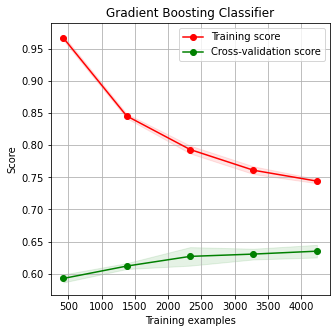

In [102]:
model9 = GradientBoostingClassifier(random_state=0)
model9.fit(train_X, train_y)
preds9 = model9.predict(test_X)

roc_9 = roc_auc_score(test_y, preds9)
f1_9 = f1_score(test_y, preds9)
score_9 = model9.score(test_X, test_y)

print(f'ROC Score: {roc_9}, F1 Score: {f1_9} and Accuracy Score: {score_9}')

plot_learning_curve(model9, 'Gradient Boosting Classifier', train_X, train_y)

In [107]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7059 entries, 0 to 7058
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AWAY_STL         7059 non-null   int64  
 1   AWAY_BLK         7059 non-null   int64  
 2   AWAY_PF          7059 non-null   int64  
 3   HOME_STL         7059 non-null   int64  
 4   HOME_BLK         7059 non-null   int64  
 5   HOME_PF          7059 non-null   int64  
 6   HOME_OFF_RATING  7059 non-null   float64
 7   HOME_DEF_RATING  7059 non-null   float64
 8   HOME_AST_TOV     7059 non-null   float64
 9   HOME_AST_RATIO   7059 non-null   float64
 10  HOME_TM_TOV_PCT  7059 non-null   float64
 11  HOME_TS_PCT      7059 non-null   float64
 12  HOME_PACE        7059 non-null   float64
 13  HOME_PIE         7059 non-null   float64
 14  AWAY_OFF_RATING  7059 non-null   float64
 15  AWAY_DEF_RATING  7059 non-null   float64
 16  AWAY_AST_TOV     7059 non-null   float64
 17  AWAY_AST_RATIO

In [121]:
preds5

array([0.49006382, 0.55647395, 0.57443931, ..., 0.28163115, 0.04328209,
       0.67165435])